## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
#mouse_metadata
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
#study_results
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
combined_data_df=pd.merge(mouse_metadata_df,study_results_df, on = "Mouse ID")
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
combined_data_df["Mouse ID"].count()

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_combined_data_df=combined_data_df.groupby("Mouse ID")
mouse_timepoint_comined_df = grouped_combined_data_df["Timepoint"].value_counts()
mouse_timepoint_comined_df.head()

Mouse ID  Timepoint
a203      0            1
          5            1
          10           1
          15           1
          20           1
Name: Timepoint, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_df["Mouse ID"].value_counts()



g989    13
a818    10
m650    10
b128    10
r604    10
        ..
t573     1
u153     1
v199     1
d133     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [8]:
# Checking the number of mice in the clean DataFrame.
combined_data_df['Mouse ID'].count()

1893

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_grouped = combined_data_df.groupby(["Drug Regimen"])
regimen_grouped


#create computation for the mean of each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean().round(3)

#Create computation for the median of each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median().round(3)

#Create computation for the variance of each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var().round(3)

#create computation for the standard deviation of each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std().round(3)

#create computation for the SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem().round(3)


# Assemble the resulting series into a single summary dataframe.
summary_regimen_grouped_df=pd.DataFrame({'Mean':regimen_mean,'Median':regimen_median,'Variance':regimen_variance,
                                        'Standard deviation':regimen_std,'SEM':regimen_sem})
summary_regimen_grouped_df


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_group_stats = regimen_grouped.agg(
        
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
        
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),
        
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),
        
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),
        
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)).round(3)
drug_group_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [11]:
## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
grouped_regimen_df=combined_data_df.groupby("Drug Regimen")["Mouse ID"].count()
#grouped_regimen_df=pd.DataFrame("grouped_regimen_df")
grouped_regimen_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

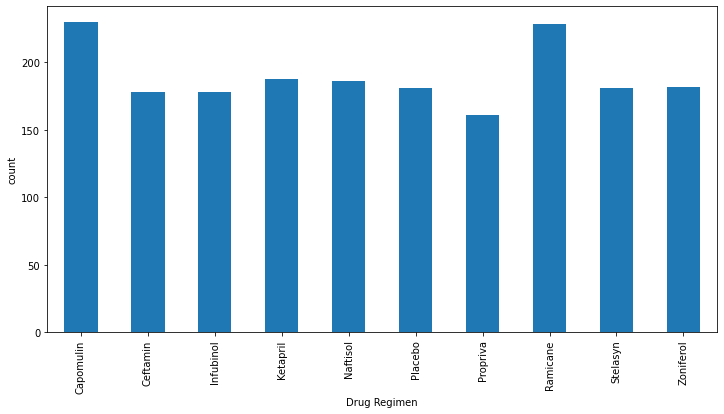

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

grouped_regimen_df.plot(kind="bar", figsize=(12,6))

#set chart title
plt.title("")
plt.xlabel("Drug Regimen")
plt.ylabel("count")

#show chart and set layout
plt.show()
plt.tight_layout()


In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender=combined_data_df.groupby('Sex')["Mouse ID"].count()
mouse_gender


Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

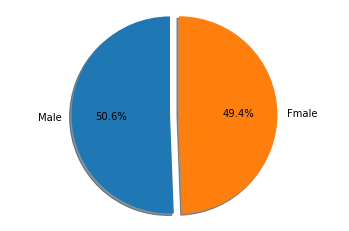

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Fmale'
sizes = [958, 935]
explode = (0.09, 0)  # 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # this ensures that pie is drawn as a circle.

plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimes = combined_data_df[combined_data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]##

treatment_regimes = treatment_regimes.sort_values(["Timepoint"], ascending=True)
treatment_regimes

treatment_regimes_data = treatment_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

treatment_regimes_data

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens_sort = combined_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
treatment_regimens_sort_df=pd.DataFrame(treatment_regimens_sort)
treatment_regimens_sort_df

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df=pd.merge(combined_data_df,treatment_regimens_sort_df,on = "Tumor Volume (mm3)")
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,k403,Ramicane,Male,21,16,0,45.0,0
2,k403,Ramicane,Male,21,16,0,45.0,0
3,k403,Ramicane,Male,21,16,0,45.0,0
4,k403,Ramicane,Male,21,16,0,45.0,0


In [17]:


#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
treatment_regimen_sort = combined_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
treatment_regimen_sort.head()

# Turn retrieved data into dataframe to easily manipulate
treatment_regimen_df =treatment_regimen_sort.to_frame()
treatment_regimen_df


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Zoniferol    q633               70.827796
             s337               62.109651
             w140               47.717952
             w575               68.401286
             x613               48.077646

[249 rows x 1 columns]

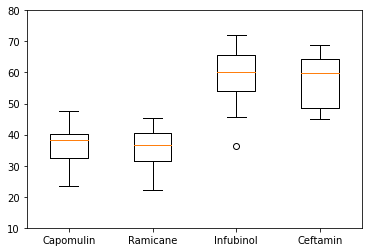

In [18]:
#Create a list to use as labels and dataframe
Top4_regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = treatment_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(Top4_regimen)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=Top4_regimen)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

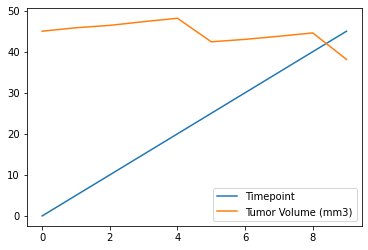

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_point_vs_tumor = combined_data_df[combined_data_df["Mouse ID"].isin(["j119"])]
time_point_vs_tumor

time_point_vs_tumor_data = time_point_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_point_vs_tumor_data

line_plot_df = time_point_vs_tumor_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()


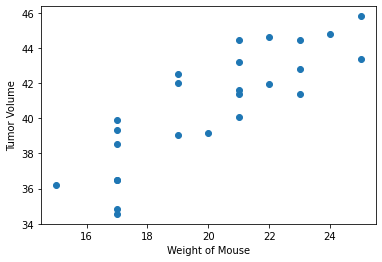

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Pull values for x and y values
Capomulin_df = combined_data_df.loc[(combined_data_df["Drug Regimen"] == "Capomulin"),:]

mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()


## Correlation and Regression

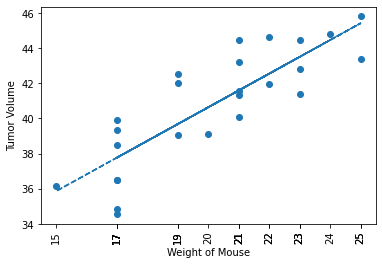

The correlation between weight and tumor value is 0.84


In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')
 